# EDA of cereals.
## Introduction
Cereal has become an integral part of the breakfast regime, cereals as marketed as being a healthy food, and with this EDA we will discern the attributes that make people choose one brand over other, such as taste, price, nutrition value etc.

I will also try to use a linear regression model to predict ratings.

## Let's get started
### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # to change categorical data into numerical data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Mounting G-drive to upload dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Defining Dataframe and printing necessary summaries

In [3]:
def data_frame():
  """Reads the csv into dataframe object, prints head, shape and dtypes of dataframe.
  And returns the dataframe"""
  data = pd.read_csv('/content/gdrive/My Drive/datasets/cereal/dataset/cereal.csv')
  print("The first 5 rows of data is:")
  print(data.head)
  print("\nThe shape of the data is:")
  print("Rows: %s & Columns: %s" %(data.shape[0], data.shape[1]))
  print("\nThe dtypes of columns is:") 
  print(data.dtypes)
  print("\nThe null values of data is:")
  print(data.isnull().sum())
  print("\nThe summary of the data is:")
  print(data.describe())
  return data

df = data_frame()

The first 5 rows of data is:
<bound method NDFrame.head of                          name mfr type  ...  weight  cups     rating
0                   100% Bran   N    C  ...     1.0  0.33  68.402973
1           100% Natural Bran   Q    C  ...     1.0  1.00  33.983679
2                    All-Bran   K    C  ...     1.0  0.33  59.425505
3   All-Bran with Extra Fiber   K    C  ...     1.0  0.50  93.704912
4              Almond Delight   R    C  ...     1.0  0.75  34.384843
..                        ...  ..  ...  ...     ...   ...        ...
72                    Triples   G    C  ...     1.0  0.75  39.106174
73                       Trix   G    C  ...     1.0  1.00  27.753301
74                 Wheat Chex   R    C  ...     1.0  0.67  49.787445
75                   Wheaties   G    C  ...     1.0  1.00  51.592193
76        Wheaties Honey Gold   G    C  ...     1.0  0.75  36.187559

[77 rows x 16 columns]>

The shape of the data is:
Rows: 77 & Columns: 16

The dtypes of columns is:
name       

### Columns description
* Name: Name of cereal
* mfr: Manufacturer of cereal
  * A = American Home Food Products;
  * G = General Mills
  * K = Kelloggs
  * N = Nabisco
  * P = Post
  * Q = Quaker Oats
  * R = Ralston Purina
* type:
  * cold
  * hot
* calories: calories per serving
* protein: grams of protein
* fat: grams of fat
* sodium: milligrams of sodium
* fiber: grams of dietary fiber
* carbo: grams of complex carbohydrates
* sugars: grams of sugars
* potass: milligrams of potassium
* vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
* shelf: display shelf (1, 2, or 3, counting from the floor)
* weight: weight in ounces of one serving
* cups: number of cups in one serving
* rating: a rating of the cereals (Possibly from Consumer Reports?)

### Checking for negative values

In [4]:
print(df[df.iloc[:,3:] < 0].count())

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64


### Checking the rows for carbo, sugars, potass to be < 0

In [5]:
print(df[df['carbo'] <0])
print(df[df['sugars'] <0])
print(df[df['potass'] <0])

              name mfr type  calories  ...  shelf  weight  cups     rating
57  Quaker Oatmeal   Q    H       100  ...      1     1.0  0.67  50.828392

[1 rows x 16 columns]
              name mfr type  calories  ...  shelf  weight  cups     rating
57  Quaker Oatmeal   Q    H       100  ...      1     1.0  0.67  50.828392

[1 rows x 16 columns]
                      name mfr type  calories  ...  shelf  weight  cups     rating
4           Almond Delight   R    C       110  ...      3     1.0  0.75  34.384843
20  Cream of Wheat (Quick)   N    H       100  ...      2     1.0  1.00  64.533816

[2 rows x 16 columns]


### Removing the rows with negative value

In [6]:
df = df[(df['carbo'] >= 0) & (df['sugars'] >=0) & (df['potass'] >= 0)]
print(df[df.iloc[:,3:] < 0].sum())
print(df.head)
print(df.shape)

name        0.0
mfr         0.0
type        0.0
calories    0.0
protein     0.0
fat         0.0
sodium      0.0
fiber       0.0
carbo       0.0
sugars      0.0
potass      0.0
vitamins    0.0
shelf       0.0
weight      0.0
cups        0.0
rating      0.0
dtype: float64
<bound method NDFrame.head of                          name mfr type  ...  weight  cups     rating
0                   100% Bran   N    C  ...     1.0  0.33  68.402973
1           100% Natural Bran   Q    C  ...     1.0  1.00  33.983679
2                    All-Bran   K    C  ...     1.0  0.33  59.425505
3   All-Bran with Extra Fiber   K    C  ...     1.0  0.50  93.704912
5     Apple Cinnamon Cheerios   G    C  ...     1.0  0.75  29.509541
..                        ...  ..  ...  ...     ...   ...        ...
72                    Triples   G    C  ...     1.0  0.75  39.106174
73                       Trix   G    C  ...     1.0  1.00  27.753301
74                 Wheat Chex   R    C  ...     1.0  0.67  49.787445
75       

### Finding out which cereal has the best and which cereal has the worst rating.
* All-Bran with Extra Fiber of company 'K' is the highest rated.
* Cap 'n' Crunch of company 'Q' is the worst rated.

In [7]:
df[df['rating'] == df['rating'].max()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.5,93.704912


In [0]:
df[df['rating'] == df['rating'].min()]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
10,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.0,0.75,18.042851


### Replacing mfr code with their proper names

### Finding products for top-performer 'N' (Nabisco)

In [89]:
df[df['mfr'] == 'N']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rating_pred


In [0]:
df['mfr'] = df['mfr'].replace({'A': 'American Home', 'N': 'Nabisco', 'R': 'Ralston Purina' ,
                   'Q': 'Quaker Oats','P': 'Post' ,'G': 'General Mills', 'K': 'Kelloggs' })

### Number of products of each manufacturer and their rating distribution using boxplot.

Kelloggs          23
General Mills     22
Post               9
Ralston Purina     7
Quaker Oats        7
Nabisco            5
American Home      1
Name: mfr, dtype: int64


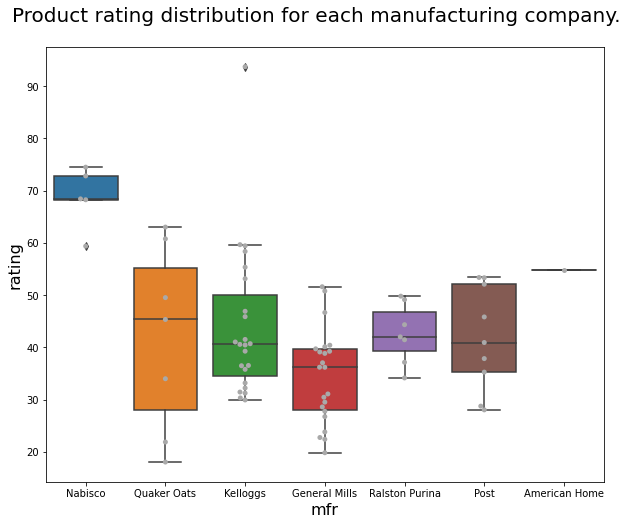

In [9]:
print(df['mfr'].value_counts())
plt.subplots(figsize = (10,8))
sns.boxplot(df['mfr'],df['rating'])
plt.suptitle("Product rating distribution for each manufacturing company.", fontsize=20, y=0.95)
plt.xlabel("Manufacturer name", fontsize=16, y=0.3)
plt.ylabel("Rating", fontsize=16)
sns.swarmplot('mfr', 'rating', data=df, color='darkgrey')

### Variation of rating with macronutrients & calorie.
Macronutrients include -
* Calories
* Protein
* Fat
* Carbo
* Fiber

#### Analysis
* Increase in calories, reduces the rating i.e. more people prefer cereal with low calories
* People prefer cereals with higher amount of protein.
* Low fat & lower carbohydrates are prefered in a cereal.
* Increase in fiber, increases the rating.

Text(0.5, 0.94, 'Variation of rating with micronutrients & calories of cereal')

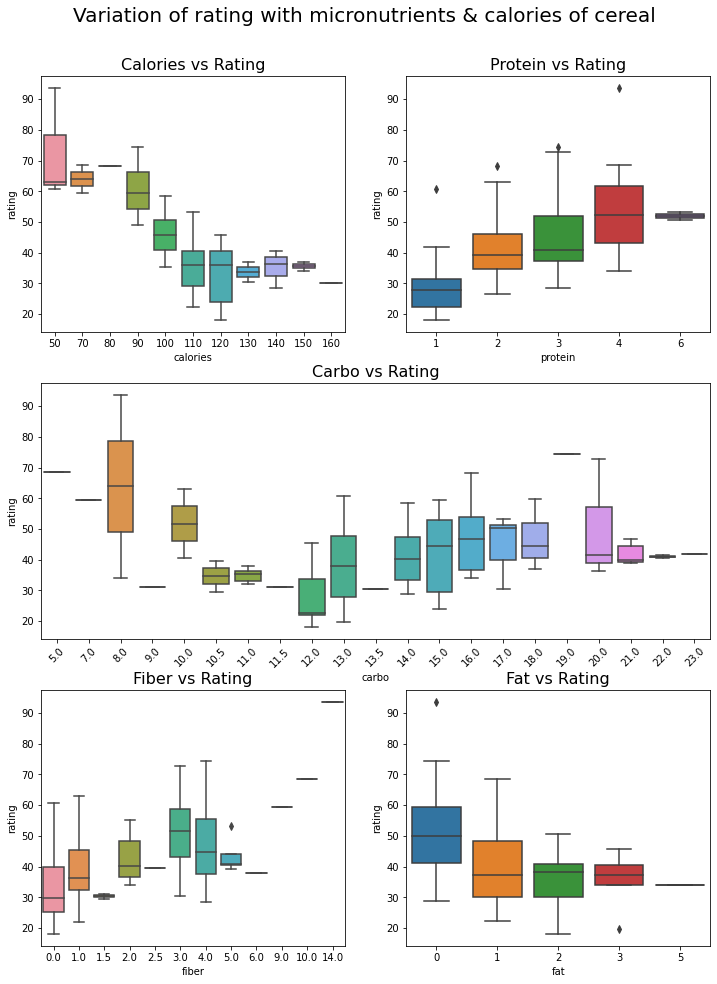

In [11]:
fig = plt.figure(figsize=(12,16))
ax1 = plt.subplot(321)
sns.boxplot('calories','rating', data=df, ax=ax1).set_title("Calories vs Rating", fontsize=16)
ax2 = plt.subplot(322)
ax4 = plt.subplot(312)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

sns.boxplot('protein', 'rating', data=df, ax=ax2).set_title("Protein vs Rating", fontsize=16)
sns.boxplot('fat', 'rating', data=df, ax=ax6).set_title("Fat vs Rating", fontsize=16)
sns.boxplot('carbo', 'rating', data=df, ax=ax4).set_title("Carbo vs Rating", fontsize=16)
sns.boxplot('fiber', 'rating', data=df, ax=ax5).set_title("Fiber vs Rating", fontsize=16)

plt.setp(ax4.get_xticklabels(), rotation=45)

plt.suptitle("Variation of rating with micronutrients & calories of cereal", fontsize=20, y=0.94)

### Variation of rating with micro-nutrients
Micronutrients include - 
* potassium, 
* sodium, 
* sugar and 
* vitamins

#### Analysis
* Rating decreases with increase in sugar content (which is easily understood) and vitamins content (which is weird)
* Rating increases with increase in potassium content.
* Rating has no concrete relation with sodium content.

Text(0.5, 1.0, 'Potassium content vs rating')

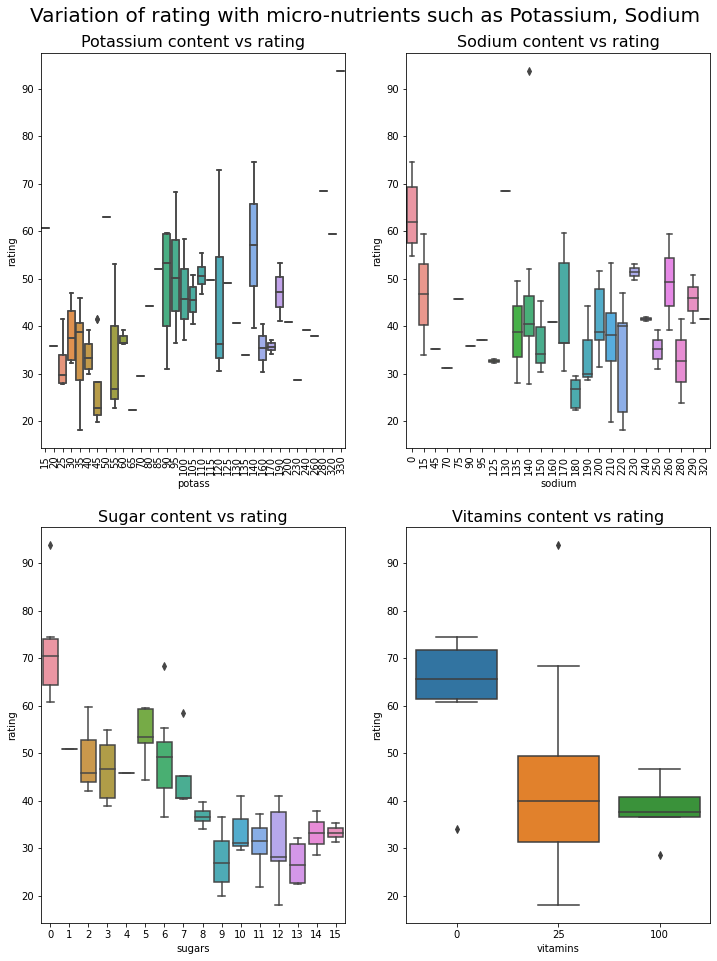

In [12]:
fig,ax = plt.subplots(2,2, figsize=(12,16))
sns.boxplot('potass', 'rating', data=df, ax=ax[0,0]).set_title("Potassium content vs rating", fontsize=16)
s=plt.setp(ax[0,0].get_xticklabels(), rotation=90)
sns.boxplot('sodium', 'rating', data=df, ax=ax[0,1]).set_title("Sodium content vs rating", fontsize=16)
sns.boxplot('sugars', 'rating', data=df, ax=ax[1,0]).set_title("Sugar content vs rating", fontsize=16)
sns.boxplot('vitamins', 'rating', data=df, ax=ax[1,1]).set_title("Vitamins content vs rating", fontsize=16)
s=plt.setp(ax[0,1].get_xticklabels(), rotation=90)
plt.suptitle("Variation of rating with micro-nutrients such as Potassium, Sodium", fontsize=20, y=0.92)
sns.boxplot('potass', 'rating', data=df, ax=ax[0,0]).set_title("Potassium content vs rating", fontsize=16)

### Variation of rating with shelf level, weights & serving size (cup).
* Level of shelf on which product is placed
* weight (in ounce) in 1 serving
* cup - cup size in 1 serving.

#### Analysis
* Rating decrease as serving size and cups per serving increase.
* There is no correlation betweehn shelf level and rating.

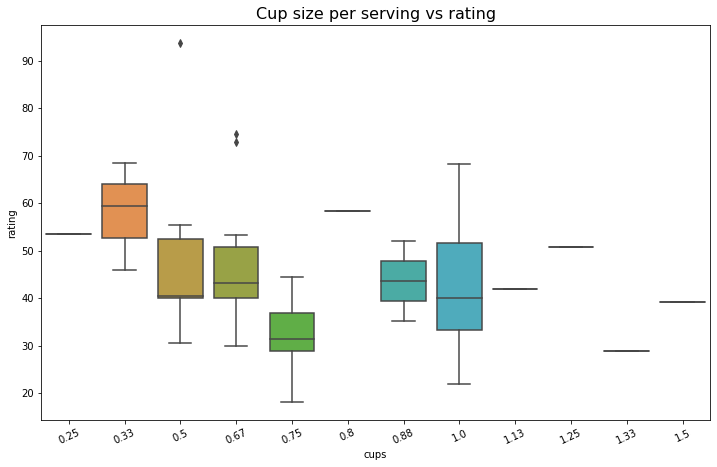

In [13]:
fig = plt.figure(figsize = (12,16))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(211)

sns.boxplot('weight', 'rating', data=df, ax=ax1).set_title("Weight (oz.) of serving vs rating", fontsize=16)
s=plt.setp(ax1.get_xticklabels(), rotation=25, ha='center')

sns.boxplot('shelf', 'rating', data=df, ax=ax2).set_title("Shelf level vs rating", fontsize=16)

sns.boxplot('cups', 'rating', data=df, ax=ax3).set_title("Cup size per serving vs rating", fontsize=16)
s=plt.setp(ax3.get_xticklabels(), rotation=25)

### Correlational heatmap

##### Convert non-numerical dtypes to numerical using LabelEncoder

In [0]:
# Using LabelEncoder from sklearn.preprocessing
le = LabelEncoder()

# Using le on 'mfr' column
le.fit(df.mfr.drop_duplicates())
df.mfr = le.transform(df.mfr)

# Using le on 'type' column
le.fit(df.type.drop_duplicates())
df.type = le.transform(df.type)

#### Plotting the correlational heatmap

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5]), <a list of 15 Text major ticklabel objects>)

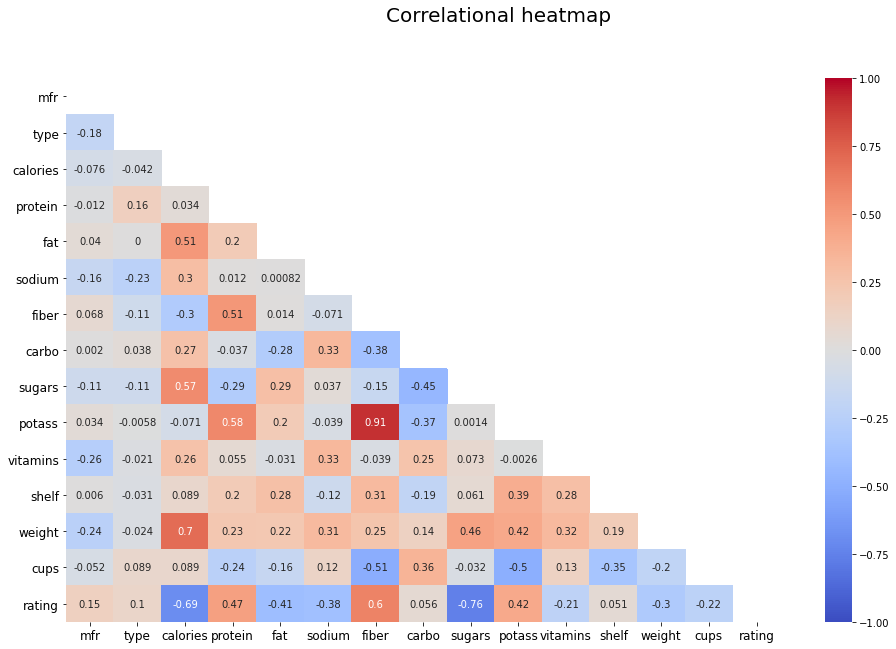

In [17]:
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True, vmin = -1, vmax = 1, cmap = 'coolwarm', mask = mask)
plt.suptitle("Correlational heatmap", fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#### Analysis
* Rating is positively related to protein, fiber, potassium content. i.e. rating improves with increase in these quantity.
* Rating is negatively related to calories, fat, sodium, and sugar content. i.e. rating decreases with increase in these quantity.


### Summary
The following factors influence rating of any cereal, either positively or negatively.


|name | positive or negative?|
|---- | --------- |
|calories |-ve |
|protein | +ve |
|fat | -ve |
|sodium | -ve |
|fiber | +ve |
|sugars | -ve |
|potassium | +ve |


## Linear regression to predict ratings.


In [71]:
# creating variable 'model' as an instance of LinearRegression() class.
model = LinearRegression()

# subsetting df with only regressors (X) i.e. 'all columns'
X = df.drop(['name','rating', 'rating_pred'], axis=1)

# subsetting the predictor (y) i.e. 'rating'
y = df[['rating']]

# using .fit(X,y) method on the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Getting value of R2 (R square)

* R square is the term use to measure the accuracy of the model.

In [72]:
# using .score(X,y) to get the R sqaure value.
# If R square = 1, the model is 100% accurate
r_sq = model.score(X, y)
print(r_sq)

0.9999999999999994


### Getting b0 & b1,b2,b3 ... coefficient
* The generated model can be summarised as,

  `y = b0 + b1x1 + b2x2 + b3x3 + ... brxr`
  where b0 = intercept, i.e. value when x=0, and
  b1, b2, b3, ... br = predicted weights.

In [74]:
# getting b0
intercept = model.intercept_

# getting b1, b2, b3 ..
coeff = model.coef_
print(intercept)
print(coeff)

[54.92718413]
[[ 1.32618367e-08 -1.50383822e-07 -2.22724167e-01  3.27317388e+00
  -1.69140797e+00 -5.44927023e-02  3.44347979e+00  1.09245096e+00
  -7.24895124e-01 -3.39933510e-02 -5.12119688e-02 -2.96942799e-08
  -3.27788702e-07  1.29025879e-07]]


### Predicting values
* Using the .predict() method on the model, and adding 'rating_pred' column to the df.

In [75]:
# creating a new column with predicted values.
df['rating_pred'] = model.predict(X)
print(df.head(3))

                name  mfr  type  calories  ...  weight  cups     rating  rating_pred
0          100% Bran    3     0        70  ...     1.0  0.33  68.402973    68.402973
1  100% Natural Bran    5     0       120  ...     1.0  1.00  33.983679    33.983679
2           All-Bran    2     0        70  ...     1.0  0.33  59.425505    59.425505

[3 rows x 17 columns]


### Comparing predicted ratings with original rating.

Text(0.5, 0.98, 'Comparing actual ratings with predicted ratings.')

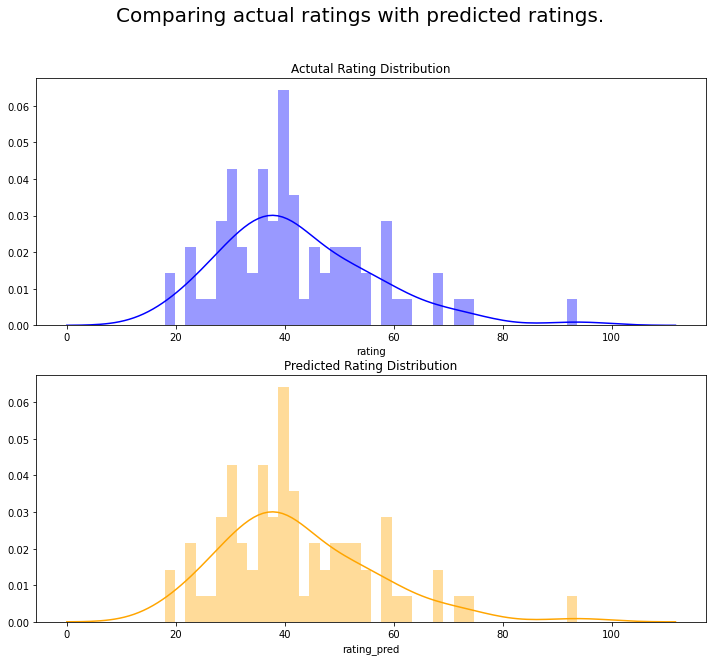

In [91]:
fig = plt.subplots(figsize=(12,10))
ax1 = sns.distplot(df.rating,color='blue', bins=40, ax=plt.subplot(211)).set_title('Actutal Rating Distribution')
ax2 = sns.distplot(df.rating_pred, bins=40, color='orange', ax=plt.subplot(212)).set_title('Predicted Rating Distribution')
plt.suptitle("Comparing actual ratings with predicted ratings.", fontsize=20)


## Summary
* Sklearn's LinearRegression() is a useful tool to create models where response(y) is generated as a function of input-independent-variables(x), of order 1.
* y = b0 + b1x1 + b2x2 + ... + brxr
* The rating of a cereal depends majorly on calories, sugars, fat, sodium, fiber, sugars & postassium, which can be seen from the heatmap.
* Nabisco has the best performing products, while General Mills cereals are generally poor.